In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("aggregated_file_copy.xlsx")

In [3]:
data.head()

,Commodity Code,Item Description,Qty,PE Amount,BM Amount,LB hrs,LB Amount,CE Amount,Major SC Amount,Fuel usage (L),...,Market Sector/Industry,Lat,Long,Delivery Method,Item Type,Flag,coordinates,state,city,suburb
0,AAAF,Additional scope,1.00,NaN,NaN,NaN,NaN,NaN,2500.0,NaN,...,Water,-27.615177,152.753355,Framework,Item,0.0,"-27.6151768, 152.7533551",Queensland,Ipswich City,Ipswich
1,ARBE,Reinstatement of concrete driveway,283.48,0.0,10343.0,238.0,19601.0,21217.0,0.0,2.720274,...,Water,-27.402220,152.986970,Framework,Item,0.0,"-27.40222, 152.98697",Queensland,Brisbane City,Everton Park
2,ARBE,Reinstatement of concrete driveway,4.20,0.0,1935.0,4.0,290.0,314.0,0.0,0.040303,...,Water,-27.463210,153.046610,Framework,Item,0.0,"-27.46321, 153.04661",Queensland,Brisbane City,New Farm
3,ARBE,Reinstatement of Driveway,22.60,0.0,4725.0,19.0,1563.0,1692.0,0.0,0.216870,...,Water,-27.360910,153.020140,Framework,Item,1.0,"-27.36091, 153.02014",Queensland,Brisbane City,Aspley
4,ARBE,Reinstatement of concrete driveway,128.66,0.0,10122.0,108.0,8896.0,9630.0,0.0,1.234621,...,Water,-27.305360,153.061760,Framework,Item,0.0,"-27.30536, 153.06176",Queensland,Brisbane City,Brighton


In [4]:
data.shape

(2561, 39)

In [5]:
data.isnull().sum()

Commodity Code                0
Item Description              0
Qty                           1
PE Amount                  2050
BM Amount                  2030
LB hrs                     2029
LB Amount                  2028
CE Amount                  2029
Major SC Amount             148
Fuel usage (L)             2125
Attribute 1                 447
Attribute 2                 447
Attribute 3                 447
Attribute 4                2156
project_number                0
total_new                     0
Total                      2175
Single Unit Price          2176
epic_embodied_carbon         64
aus_lci_embodied_carbon      64
carbon_allowance             64
construction_carbon          64
Default PE Unit Price      1651
Default BM Unit Price      1651
Default LB Unit Hrs        2307
Default SC Unit Rate       1651
Project Name                  7
Greenfield/ Brownfield        7
Client                        7
Market Sector/Industry        7
Lat                           7
Long    

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Commodity Code           2561 non-null   object 
 1   Item Description         2561 non-null   object 
 2   Qty                      2560 non-null   float64
 3   PE Amount                511 non-null    float64
 4   BM Amount                531 non-null    float64
 5   LB hrs                   532 non-null    float64
 6   LB Amount                533 non-null    float64
 7   CE Amount                532 non-null    float64
 8   Major SC Amount          2413 non-null   float64
 9   Fuel usage (L)           436 non-null    float64
 10  Attribute 1              2114 non-null   float64
 11  Attribute 2              2114 non-null   float64
 12  Attribute 3              2114 non-null   float64
 13  Attribute 4              405 non-null    float64
 14  project_number          

In [7]:
data.fillna(method='ffill',inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Commodity Code           2561 non-null   object 
 1   Item Description         2561 non-null   object 
 2   Qty                      2561 non-null   float64
 3   PE Amount                2560 non-null   float64
 4   BM Amount                2560 non-null   float64
 5   LB hrs                   2560 non-null   float64
 6   LB Amount                2560 non-null   float64
 7   CE Amount                2560 non-null   float64
 8   Major SC Amount          2561 non-null   float64
 9   Fuel usage (L)           2560 non-null   float64
 10  Attribute 1              2561 non-null   float64
 11  Attribute 2              2561 non-null   float64
 12  Attribute 3              2561 non-null   float64
 13  Attribute 4              2560 non-null   float64
 14  project_number          

In [9]:
data = data.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2560 entries, 1 to 2560
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Commodity Code           2560 non-null   object 
 1   Item Description         2560 non-null   object 
 2   Qty                      2560 non-null   float64
 3   PE Amount                2560 non-null   float64
 4   BM Amount                2560 non-null   float64
 5   LB hrs                   2560 non-null   float64
 6   LB Amount                2560 non-null   float64
 7   CE Amount                2560 non-null   float64
 8   Major SC Amount          2560 non-null   float64
 9   Fuel usage (L)           2560 non-null   float64
 10  Attribute 1              2560 non-null   float64
 11  Attribute 2              2560 non-null   float64
 12  Attribute 3              2560 non-null   float64
 13  Attribute 4              2560 non-null   float64
 14  project_number           2560

In [11]:
data['Attribute 4'].unique()

array([0.])

In [12]:
cat_cols = []
num_cols = []
for column in data:
    if(data[column].dtype=='O'):
        cat_cols.append(column)
    else:
        num_cols.append(column)
print(len(cat_cols))
print(len(num_cols))

12
27


In [13]:
numeric_data = data[num_cols]

In [14]:
numeric_data.head()

,Qty,PE Amount,BM Amount,LB hrs,LB Amount,CE Amount,Major SC Amount,Fuel usage (L),Attribute 1,Attribute 2,...,aus_lci_embodied_carbon,carbon_allowance,construction_carbon,Default PE Unit Price,Default BM Unit Price,Default LB Unit Hrs,Default SC Unit Rate,Lat,Long,Flag
1,283.48,0.0,10343.0,238.0,19601.0,21217.0,0.0,2.720274,10.0,7.0,...,0.0,4115.764458,0.007345,0.0,36.52,4.0,0.0,-27.40222,152.98697,0.0
2,4.20,0.0,1935.0,4.0,290.0,314.0,0.0,0.040303,10.0,5.0,...,0.0,769.989773,0.000109,0.0,36.52,4.0,0.0,-27.46321,153.04661,0.0
3,22.60,0.0,4725.0,19.0,1563.0,1692.0,0.0,0.216870,12.0,7.0,...,0.0,1880.207586,0.000586,0.0,36.52,4.0,0.0,-27.36091,153.02014,1.0
4,128.66,0.0,10122.0,108.0,8896.0,9630.0,0.0,1.234621,16.0,5.0,...,0.0,4027.822473,0.003333,0.0,36.52,4.0,0.0,-27.30536,153.06176,0.0
5,20.08,0.0,2772.0,17.0,1388.0,1503.0,0.0,0.192688,10.0,5.0,...,0.0,1103.055117,0.000520,0.0,36.52,4.0,0.0,-27.46971,152.99343,1.0


<Axes: >

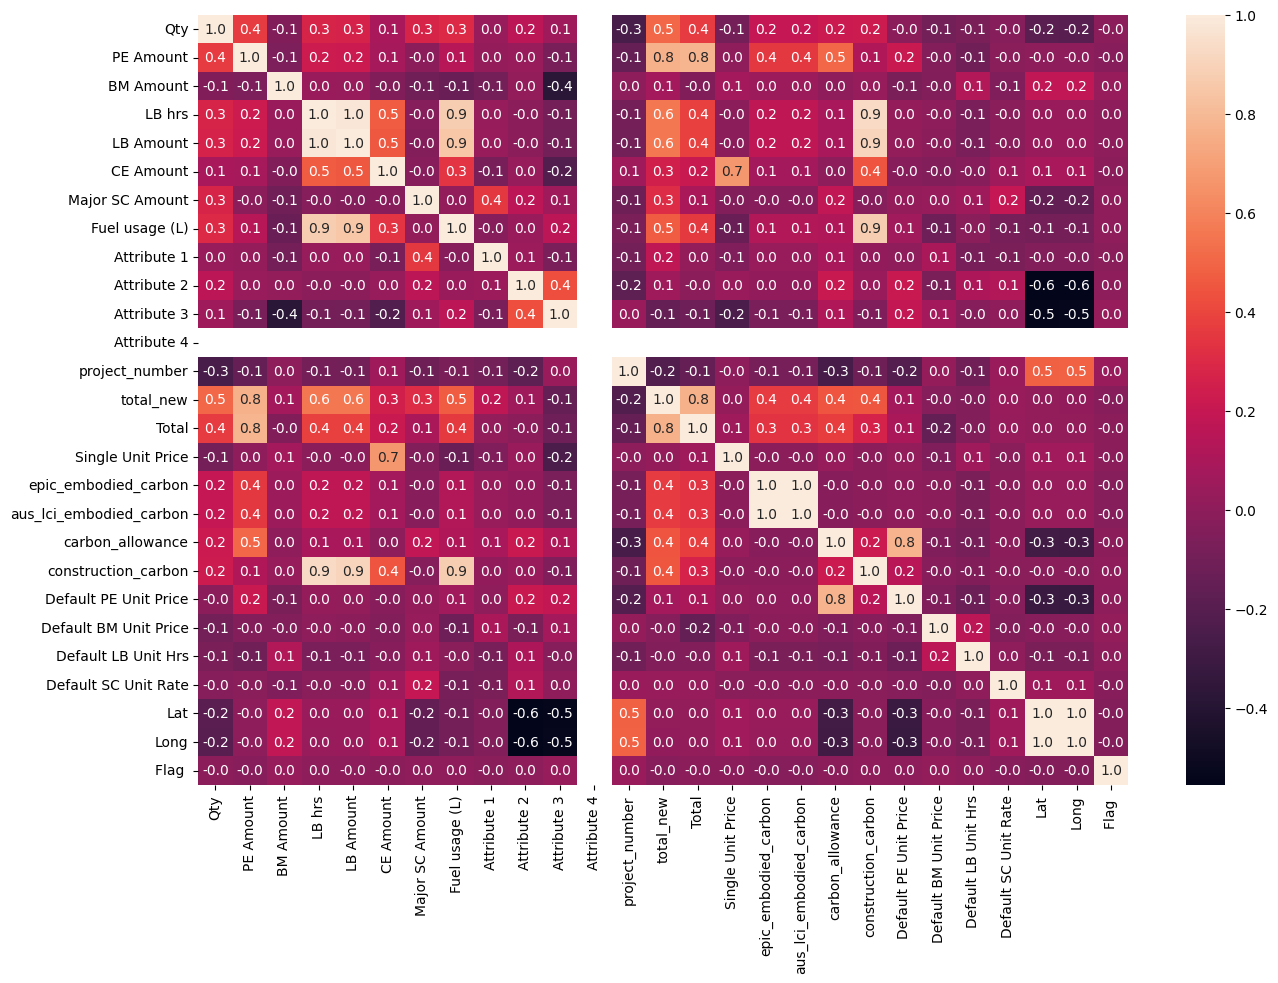

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(data=numeric_data.corr(),fmt='.1f',annot=True)

In [16]:
numeric_data.corr()

,Qty,PE Amount,BM Amount,LB hrs,LB Amount,CE Amount,Major SC Amount,Fuel usage (L),Attribute 1,Attribute 2,...,aus_lci_embodied_carbon,carbon_allowance,construction_carbon,Default PE Unit Price,Default BM Unit Price,Default LB Unit Hrs,Default SC Unit Rate,Lat,Long,Flag
Qty,1.000000,0.366342,-0.050785,0.276059,0.268797,0.090251,0.273167,0.300646,0.037927,0.164077,...,0.196800,0.217261,0.228013,-0.010864,-0.100208,-0.068067,-0.028350,-0.189022,-0.192196,-0.006297
PE Amount,0.366342,1.000000,-0.058068,0.222708,0.219246,0.084951,-0.006511,0.144092,0.026230,0.036964,...,0.352559,0.503962,0.115474,0.212140,-0.037931,-0.110414,-0.020550,-0.001124,-0.002672,-0.021887
BM Amount,-0.050785,-0.058068,1.000000,0.041128,0.034379,-0.046949,-0.109202,-0.131940,-0.092190,0.018618,...,0.047962,0.008987,0.033153,-0.068111,-0.042496,0.125522,-0.053594,0.183557,0.181477,0.033495
LB hrs,0.276059,0.222708,0.041128,1.000000,0.977373,0.469628,-0.033037,0.877898,0.029414,-0.003053,...,0.177871,0.092972,0.928299,0.021579,-0.002440,-0.074828,-0.017677,0.041110,0.039543,0.002842
LB Amount,0.268797,0.219246,0.034379,0.977373,1.000000,0.455019,-0.035903,0.853609,0.036149,-0.005540,...,0.173716,0.089516,0.906917,0.019904,-0.005739,-0.071582,-0.018730,0.044520,0.042903,-0.000094
CE Amount,0.090251,0.084951,-0.046949,0.469628,0.455019,1.000000,-0.021799,0.342457,-0.081453,0.027596,...,0.070502,0.000285,0.442703,-0.022794,-0.041401,-0.022325,0.063663,0.092723,0.091701,-0.004573
Major SC Amount,0.273167,-0.006511,-0.109202,-0.033037,-0.035903,-0.021799,1.000000,0.018066,0.352252,0.161713,...,-0.027266,0.179536,-0.028218,0.023984,0.028061,0.061299,0.196399,-0.158754,-0.160431,0.005914
Fuel usage (L),0.300646,0.144092,-0.131940,0.877898,0.853609,0.342457,0.018066,1.000000,-0.024577,0.043979,...,0.129339,0.115884,0.877254,0.064576,-0.116661,-0.015190,-0.082356,-0.092327,-0.092512,0.008471
Attribute 1,0.037927,0.026230,-0.092190,0.029414,0.036149,-0.081453,0.352252,-0.024577,1.000000,0.051186,...,0.038149,0.091120,0.012587,0.005795,0.102106,-0.077531,-0.066008,-0.041371,-0.043244,-0.016132
Attribute 2,0.164077,0.036964,0.018618,-0.003053,-0.005540,0.027596,0.161713,0.043979,0.051186,1.000000,...,0.014989,0.214496,0.040209,0.214244,-0.067170,0.108947,0.126498,-0.552544,-0.556124,0.002101


In [17]:
cat_cols

['Commodity Code',
 'Item Description',
 'Project Name',
 'Greenfield/ Brownfield',
 'Client',
 'Market Sector/Industry',
 'Delivery Method',
 'Item Type',
 'coordinates',
 'state',
 'city',
 'suburb']

<Axes: >

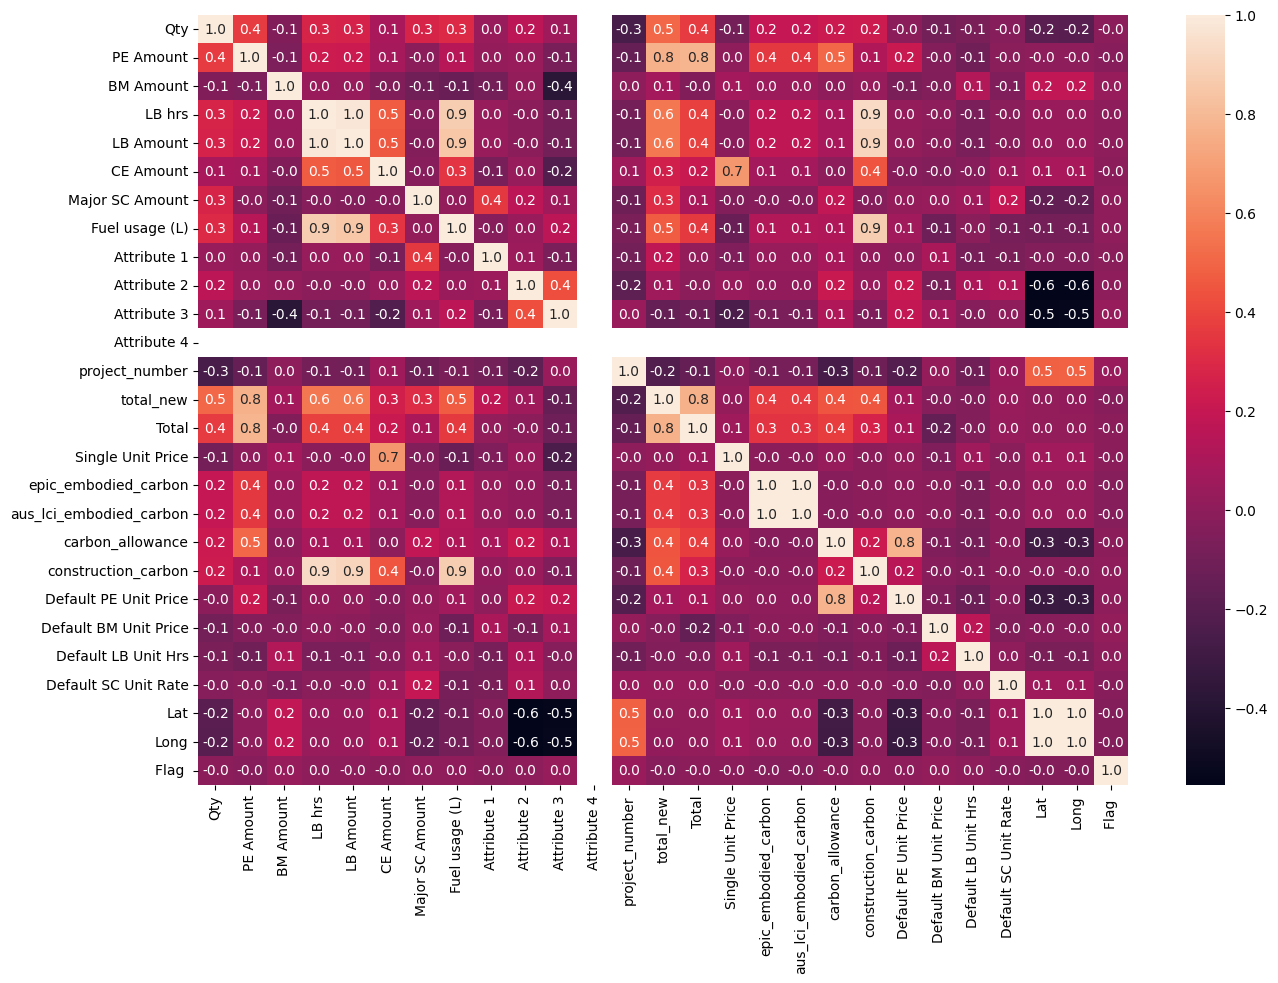

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(data=numeric_data.corr(),fmt='.1f',annot=True)

In [19]:
x = data.drop(columns='Total',axis=1)
y = data['Total']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(2048, 38) (2048,) (512, 38) (512,)


In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [23]:
for column in range(len(cat_cols)):
    x_train[cat_cols[column]] = encoder.fit_transform(x_train[cat_cols[column]])
    x_test[cat_cols[column]] = encoder.fit_transform(x_test[cat_cols[column]])

In [24]:
x_train

,Commodity Code,Item Description,Qty,PE Amount,BM Amount,LB hrs,LB Amount,CE Amount,Major SC Amount,Fuel usage (L),...,Market Sector/Industry,Lat,Long,Delivery Method,Item Type,Flag,coordinates,state,city,suburb
362,15,29,2.000,0.0,2840.0,10.0,842.0,653.0,526.0,0.104096,...,0,-27.541715,152.981977,0,0,1.0,304,0,1,38
1134,46,40,70.790,0.0,0.0,0.0,0.0,0.0,8963.0,0.840993,...,0,-27.430212,153.002664,0,0,1.0,128,0,1,103
1223,46,40,63.270,0.0,0.0,0.0,0.0,0.0,8011.0,0.840993,...,0,-27.418497,153.044336,0,0,1.0,95,0,1,161
1926,52,7,121.000,0.0,0.0,0.0,0.0,0.0,735.0,0.840993,...,0,-34.890724,138.617491,0,0,0.0,423,1,0,153
1481,47,27,1.000,0.0,0.0,0.0,0.0,0.0,3110.0,0.840993,...,0,-27.432422,153.031153,0,0,0.0,135,0,1,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,48,45,1.000,0.0,0.0,0.0,0.0,0.0,2275.0,0.840993,...,0,-27.476757,153.056760,0,0,1.0,232,0,1,106
1096,46,40,71.933,0.0,0.0,0.0,0.0,0.0,7605.0,0.840993,...,0,-27.532626,153.045213,0,0,0.0,300,0,1,145
1131,46,40,37.429,0.0,0.0,0.0,0.0,0.0,4739.0,0.840993,...,0,-27.422848,153.007746,0,0,1.0,115,0,1,3
1295,46,40,67.539,0.0,0.0,0.0,0.0,0.0,9928.0,0.840993,...,0,-27.460282,153.049805,0,0,1.0,196,0,1,146


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
x_train

array([[-1.22631253, -0.76229669, -0.36308356, ..., -0.43033148,
         0.13086248, -0.90627707],
       [ 0.42230854, -0.42302293,  0.3606573 , ..., -0.43033148,
         0.13086248,  0.4377317 ],
       [ 0.42230854, -0.42302293,  0.28153924, ..., -0.43033148,
         0.13086248,  1.63700108],
       ...,
       [ 0.42230854, -0.42302293,  0.00966561, ..., -0.43033148,
         0.13086248, -1.62997411],
       [ 0.42230854, -0.42302293,  0.32645347, ..., -0.43033148,
         0.13086248,  1.3268452 ],
       [ 0.05003926,  1.73599189, -0.37360458, ...,  2.32379001,
        -1.88422292, -0.82356884]])

In [28]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

In [29]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((2048, 38), (2048,), (512, 38), (512,))

In [30]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred = linear_model.predict(x_train)

In [32]:
from sklearn.metrics import r2_score
prediction = r2_score(y_train,y_pred)

In [33]:
prediction

0.8019033342195154

In [34]:
y_pred = linear_model.predict(x_test)
prediction = r2_score(y_test,y_pred)

In [35]:
prediction

0.40848218929569735